<a href="https://colab.research.google.com/github/Giuppone/CelMech/blob/main/Guia_prat_2021_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importo librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('seaborn-white')
plt.style.use('default')
plt.figure(figsize=(6.4,4.8))
import pandas

<Figure size 640x480 with 0 Axes>

In [ ]:
M1 = pandas.read_csv('exoplanet.eu_catalog.csv',delimiter=',')

#ordenar las filas y convertirlas a matriz
M1.columns = M1.columns.str.rstrip() #cortar todos los espacios en blanco
s1=M1.sort_values(by=['star_name','orbital_period'])
M=pandas.DataFrame(s1)
M=pandas.DataFrame.as_matrix(s1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [ ]:
cols = M1.columns.tolist()
cols  

['name',
 'planet_status',
 'mass',
 'mass_error_min',
 'mass_error_max',
 'mass_sini',
 'mass_sini_error_min',
 'mass_sini_error_max',
 'radius',
 'radius_error_min',
 'radius_error_max',
 'orbital_period',
 'orbital_period_error_min',
 'orbital_period_error_max',
 'semi_major_axis',
 'semi_major_axis_error_min',
 'semi_major_axis_error_max',
 'eccentricity',
 'eccentricity_error_min',
 'eccentricity_error_max',
 'inclination',
 'inclination_error_min',
 'inclination_error_max',
 'angular_distance',
 'discovered',
 'updated',
 'omega',
 'omega_error_min',
 'omega_error_max',
 'tperi',
 'tperi_error_min',
 'tperi_error_max',
 'tconj',
 'tconj_error_min',
 'tconj_error_max',
 'tzero_tr',
 'tzero_tr_error_min',
 'tzero_tr_error_max',
 'tzero_tr_sec',
 'tzero_tr_sec_error_min',
 'tzero_tr_sec_error_max',
 'lambda_angle',
 'lambda_angle_error_min',
 'lambda_angle_error_max',
 'impact_parameter',
 'impact_parameter_error_min',
 'impact_parameter_error_max',
 'tzero_vr',
 'tzero_vr_error_min

In [ ]:
# M1.discovered
M1.star_teff[20:22]

20       NaN
21    2300.0
Name: star_teff, dtype: float64

In [ ]:
#M1.orbital_period[:]
#M=pandas.DataFrame.as_matrix(s1)
s1.star_name[4213:4216],s1.name[4213:4216]   #hay sistemas q tienen nombre aunque no existe el nombre de la estrella.

(4260    PSR J2055+3829
 4261    PSR J2241-5236
 4262            PZ Tel
 Name: star_name, dtype: object, 4260    PSR J2055+3829 b
 4261    PSR J2241-5236 b
 4262            PZ Tel b
 Name: name, dtype: object)

In [ ]:
M[20:30,24]

array([2010.0, 2010.0, 2010.0, 2016.0, 2020.0, 2000.0, 2017.0, 2020.0,
       2018.0, 2017.0], dtype=object)

In [ ]:
i=0
M[:,1]=False 
while True:
    M[i,30]=M[i+1,11]/M[i,11]  # guardo en la columna 30 el dato de Pi+1/Pi
    M[i,1] =M[i+1,68]==M[i,68]  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
#    print(M[i,1],M[i,30],M[i,68],M[i,11])
    i=i+1
    if (i>len(s1.star_mass)-3):        #uso esto para ver si anda el codigo
#    if (i>14):      #si descomento esta linea debo comentar la otra
        break   
cond=M[:,1].astype('bool')  #convertir a operator condicional!!    

In [ ]:
# #cond.applymap(type)
# #cond=M[:,1]
# #cond.shape
# #cond.dtype
# M[cond,11]
# M[cond,68]
# N=M[cond,:] #esto toma todos las columnas de la Matriz M que cumplan el TRUE

In [ ]:
#np.where(cond ) # copio la fila de matrices que cumple cierta condicion en M21 y luego solo opero con esas filas.
# p21=M[cond,30].astype('float')   #tengo q especificarle q son números los q les paso a p21
# p1 =M[cond,11].astype('float')   #tengo q especificarle q son números los q les paso a p1
# pname =M[cond,68].astype('str') #texto rv
p21=M[cond,30]#tengo q especificarle q son números los q les paso a p21
p1 =M[cond,11]  #tengo q especificarle q son números los q les paso a p1
pname =M[cond,68] #texto rv

p21[0:37]
pname[36]


'GJ 180'

(1, 10)

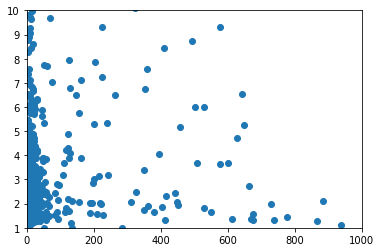

In [ ]:
plt.scatter(M[cond,11], M[cond,30])
plt.xlim(1e-2,1000)
plt.ylim(1,10)

/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


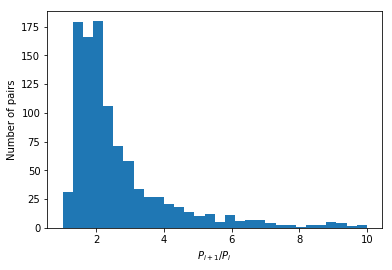

In [ ]:
plt.hist(p21.astype('float'), bins=30,range=[1,10]);
plt.xlabel(r"$P_{i+1}/P_{i}$");
plt.ylabel("Number of pairs");

In [ ]:
M[0:3,5], s1.mass[0:3]

(array([nan, 10.78, 19.4], dtype=object), 4192    0.43
 4392     NaN
 0        NaN
 Name: mass, dtype: float64)

In [ ]:
i=0
M[:,1]=False
M[:,30]=False #M[i+1,11]/M[i,11]  # guardo en la columna 30 el dato de Pi+1/Pi
M[:,31]=False #M[i+1,2] /M[i,2]  #m
M[:,32]=False #M[i+1,5] /M[i,5]  #msini  
M[:,33]=False #M[i+1,8] /M[i,8]  #r2/r1   

while True:
    if(M[i+1,68]==M[i,68]):
        M[i,30]=M[i+1,11]/M[i,11]  # guardo en la columna 30 el dato de Pi+1/Pi
        M[i,31]=M[i+1,2] /M[i,2]  #m
        M[i,32]=M[i+1,5] /M[i,5]  #msini  
        M[i,33]=M[i+1,8] /M[i,8]  #r2/r1   
#     if M[i,7] != 0: M[i,33]=M[i+1,8] /M[i,8]  #r2/r1   
#     print(i,M[i,31],M[i,32],M[i,2],M[i,5],M[i,68])   #esto imprimir para chequear
#     print(i,M[i,31],M[i,32],M[i,33],M[i,5],M[i,68],M[i,8])   #esto imprimir para chequear    
    i=i+1
    if (i>len(s1.star_mass)-3):        #uso esto para ver si anda el codigo
#     if (i>3226):      #si descomento esta linea debo comentar la otra
        break   

In [ ]:
masked = M[:, [68,30,11,31,32,2,5,17,82]]
masked
np.savetxt("mmr.txt", masked, delimiter="\t", fmt="%s")

In [ ]:
i=0
M[:,1]=False 
while True:
    M[i,1] =M[i+1,68]==M[i,68]  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):        #uso esto para ver si anda el codigo
#    if (i>14):      #si descomento esta linea debo comentar la otra
        break   
cond=M[:,1].astype('bool')  #convertir a operator condicional!!

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and M[i,63]=='Primary Transit'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condt=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and M[i,63]=='Radial Velocity'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condr=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and M[i,63]=='TTV'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condttv=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and M[i,63]=='Imaging'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condi=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 


pnamer =M[condr,68].astype('str') #texto rv

p21t=M[condt,30].astype('float')   #condicion p2/p1 transits
p1t =M[condt,11].astype('float')   #condicion p1 transits

In [ ]:
M[:,63]

array(['Microlensing', 'Radial Velocity', 'Radial Velocity', ...,
       'Imaging', 'Imaging', 'Imaging'], dtype=object)

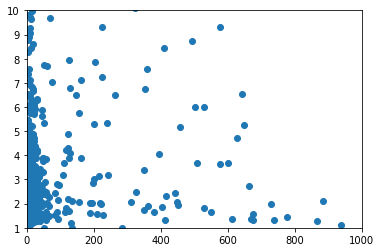

In [ ]:
# plt.scatter[]
plt.xlim(1e-2,1000)
plt.ylim(1,10)
plt.scatter(M[cond,11], M[cond,30])


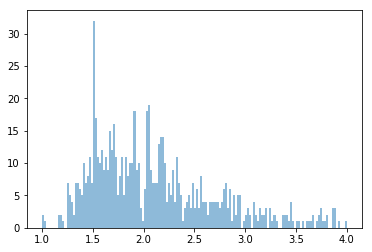

In [ ]:
plt.hist(M[condt,30].astype('float'),bins=150,range=[1,4],alpha=0.5);

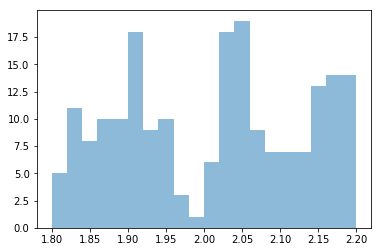

In [ ]:
plt.hist(M[condt,30].astype('float'),bins=20,range=[1.8,2.2],alpha=0.5);

In [ ]:
i=0
M[:,1]=False 
delta =0.15
while True:
    M[i,1] =M[i+1,68]==M[i,68] and abs(M[i,30]-2)<delta # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):        #uso esto para ver si anda el codigo
#    if (i>14):      #si descomento esta linea debo comentar la otra
        break   
cond=M[:,1].astype('bool')  #convertir a operator condicional!!

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and abs(M[i,30]-2)<delta and M[i,63]=='Primary Transit'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condt=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and abs(M[i,30]-2)<delta and M[i,63]=='Primary Transit' and M[i,31]==M[i,31] # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condtm=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and abs(M[i,30]-2)<delta and M[i,63]=='Radial Velocity'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condr=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 

i=0
M[:,1]=False
while True:
    M[i,1] =M[i+1,68]==M[i,68] and abs(M[i,30]-2)<delta and M[i,63]=='TTV'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
    i=i+1
    if (i>len(s1.star_mass)-3):
        break #uso esto para ver si anda el codigo
condttv=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 


pnamer =M[condr,68].astype('str') #texto rv

p21t=M[condt,30].astype('float')   #condicion p2/p1 transits
p1t =M[condt,11].astype('float')   #condicion p1 transits

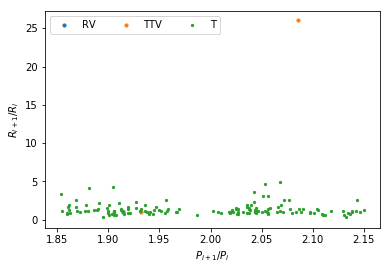

In [ ]:
# plt.xlim(1.9,2.1)
# plt.ylim(0.0,6)
plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel(r"$R_{i+1}/R_i$");
plt.scatter(M[condr,30].astype('float'),M[condr,33].astype('float'),s=10, label='RV')
plt.scatter(M[condttv,30].astype('float'),M[condttv,33].astype('float'),s=10, label='TTV')
plt.scatter(M[condt,30].astype('float'),M[condt,33].astype('float'),s=5, label='T')
plt.legend(ncol=3, loc='upper left')
plt.savefig('pratrratall.png',dpi=300,bbox_inches="tight")


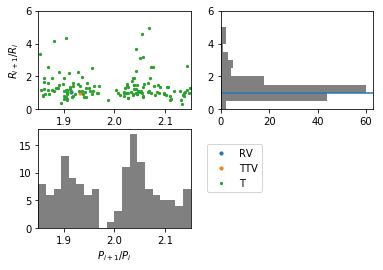

In [ ]:
# gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
#                       left=0.1, right=0.9, bottom=0.1, top=0.9,
#                       wspace=0.05, hspace=0.05)
# fig.add_subplot(gs[1, 0])

ax1= plt.subplot(2,2,1)
plt.xlim(1.85,2.15)
plt.ylim(0.0,6)
plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel(r"$R_{i+1}/R_i$");
plt.scatter(M[condr,30].astype('float'),M[condr,33].astype('float'),s=10, label='RV')
plt.scatter(M[condttv,30].astype('float'),M[condttv,33].astype('float'),s=10, label='TTV')
plt.scatter(M[condt,30].astype('float'),M[condt,33].astype('float'),s=5, label='T')
ax1.legend(ncol=1,bbox_to_anchor=(1.5, -0.3))

ax2=plt.subplot(2,2,2)
plt.ylim(0,6)
plt.hist(M[condt,33].astype('float'), bins=np.arange(0,6,0.5), orientation='horizontal', color='gray');
plt.axhline(y=1);

plt.subplot(2,2,3)
plt.xlim(1.85,2.15)
plt.hist(M[condt,30].astype('float'), bins=20, range=[1.85,2.15], color='gray');
plt.xlabel(r"$P_{i+1}/P_i$");

# plt.subplot(2,2,4)
# ax1.legend(ncol=3)

plt.savefig('pratrratall.png',dpi=300,bbox_inches="tight")


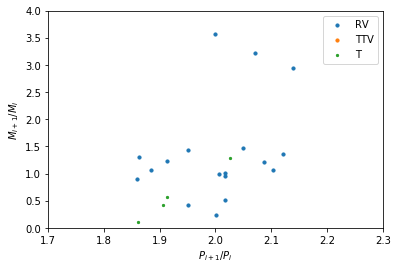

In [ ]:
plt.xlim(1.7,2.3)
plt.ylim(0.0,4)
plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel(r"$M_{i+1}/M_i$");
plt.scatter(M[condr,30].astype('float'),M[condr,32].astype('float'),s=10, label='RV')
plt.scatter(M[condttv,30].astype('float'),M[condttv,32].astype('float'),s=10, label='TTV')
plt.scatter(M[condt,30].astype('float'),M[condt,32].astype('float'),s=5, label='T')
# plt.scatter(M[cond,30].astype('float'),M[condr,32].astype('float'),s=10)
plt.legend()
plt.savefig('pratmrat.png',dpi=300,bbox_inches="tight")

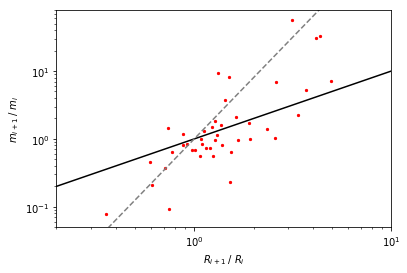

In [ ]:
plt.xlim(0.2,10)
plt.ylim(0.05,80)

plt.xlabel(r"$R_{i+1}\;/\;R_i$");
plt.ylabel(r"$m_{i+1}\;/\;m_i$");
plt.yscale('log')
plt.xscale('log')
xlin=np.arange(0.1,50,10)
ylin=np.arange(0.1,50,10)
plt.plot(xlin,ylin,'-', c='k')
plt.plot(xlin,(xlin)**3,'--', c='gray')
# m, b = np.polyfit(M[condt,33].astype('float'), M[condt,31].astype('float'), 1) #m = slope, b = intercept.
# plt.plot(M[condt,33].astype('float'), m*M[condt,33].astype('float') + b) #add line of best fit.

# plt.scatter(M[condr,33].astype('float'),M[condr,32].astype('float'),s=20, label='RV', c='k')
# plt.scatter(M[condttv,33].astype('float'),M[condttv,32].astype('float'),s=10, label='TTV')
plt.scatter(M[cond,33].astype('float'),M[cond,31].astype('float'),s=5, label='T', c='r')
# plt.scatter(x,y,s=5, label='T', c='b', marker='x')
# plt.scatter(M[cond,30].astype('float'),M[condr,32].astype('float'),s=10)
# plt.legend(loc='upper left')

plt.savefig('rratmrat.png',dpi=300,bbox_inches="tight")

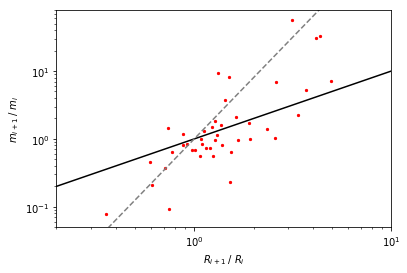

In [ ]:
plt.xlim(0.2,10)
plt.ylim(0.05,80)
# condf=   #outside
# condi=   #inside

plt.xlabel(r"$R_{i+1}\;/\;R_i$");
plt.ylabel(r"$m_{i+1}\;/\;m_i$");
plt.yscale('log')
plt.xscale('log')
xlin=np.arange(0.1,50,10)
ylin=np.arange(0.1,50,10)
plt.plot(xlin,ylin,'-', c='k')
plt.plot(xlin,(xlin)**3,'--', c='gray')
# m, b = np.polyfit(M[condt,33].astype('float'), M[condt,31].astype('float'), 1) #m = slope, b = intercept.
# plt.plot(M[condt,33].astype('float'), m*M[condt,33].astype('float') + b) #add line of best fit.

# plt.scatter(M[condr,33].astype('float'),M[condr,32].astype('float'),s=20, label='RV', c='k')
# plt.scatter(M[condttv,33].astype('float'),M[condttv,32].astype('float'),s=10, label='TTV')
plt.scatter(M[cond,33].astype('float'),M[cond,31].astype('float'),s=5, label='T', c='r')
# plt.scatter(x,y,s=5, label='T', c='b', marker='x')
# plt.scatter(M[cond,30].astype('float'),M[condr,32].astype('float'),s=10)
# plt.legend(loc='upper left')

plt.savefig('rratmrat.png',dpi=300,bbox_inches="tight")

In [ ]:

def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="")

    return ax


def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

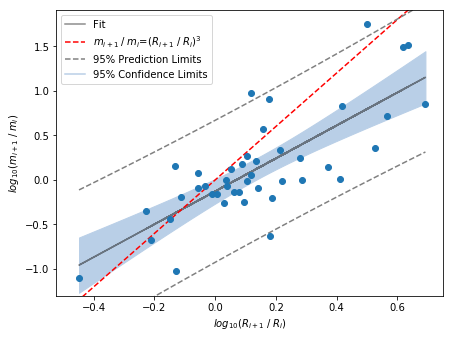

In [ ]:
# library
import scipy as sp
import scipy.stats as stats
from scipy import stats
# 1# Computations ----------------------------------------------------------------
# Raw Data
X=M[cond,33].astype('float')
Y=M[cond,31].astype('float')

mask = ~np.isnan(X) & ~np.isnan(Y) 
x = np.log10(X[mask])
y = np.log10(Y[mask])

# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = x.size                                                 # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                           
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6.4,4.8))
# Data
# ax.plot(x, y, "o", color="#b9cfe7", markersize=8, markeredgewidth=1, markeredgecolor="b", markerfacecolor="None")
ax.scatter(x, y, zorder=3)

# Fit
ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

#
xlin=np.arange(0.1,50,10)
# plt.plot(xlin,ylin,'-', c='k')
ax.plot(np.log10(xlin),np.log10((xlin)**3),'r--', label=r'$m_{i+1}\;/\;m_i$=$(R_{i+1}\;/\;R_i)^3$')

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)
#plot_ci_bootstrap(x, y, resid, ax=ax)

# Prediction Interval
pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
ax.plot(x2, y2 - pi, "--", color="0.5", label="95% Prediction Limits")
ax.plot(x2, y2 + pi, "--", color="0.5")


# Figure Modifications --------------------------------------------------------
# Borders
# ax.spines["top"].set_color("0.5")
# ax.spines["bottom"].set_color("0.5")
# ax.spines["left"].set_color("0.5")
# ax.spines["right"].set_color("0.5") 
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 

# ax.set_xticks (np.arange(-0.6,1,0.2))
# ax.set_xticklabels(10**(np.arange(-0.6,1,0.2))) 
# ax.set_xticks(np.logspace(np.log10(0.01), np.log10(10), num=30, base=10.0))

# ax.set_xticks ([0, 2,4,6])
# ax.set_xticklabels([ 'zero ', 'two ', 'four ', 'six ']) 
# ax.set_xticklabels('1','10')

plt.xlim(np.log10(0.3),np.log10(5.62))
plt.ylim(np.log10(0.05),np.log10(80))


plt.xlabel(r"$log_{10}(R_{i+1}\;/\;R_i$)");
plt.ylabel(r"$log_{10}(m_{i+1}\;/\;m_i$)");


from matplotlib import pyplot as plt
import matplotlib.ticker


# # Custom legend
handles, labels = ax.get_legend_handles_labels()
display = (0, 1, 2)
anyArtist = plt.Line2D((0, 1), (0, 0), color="#b9cfe7")    # create custom artists
legend = plt.legend(
    [handle for i, handle in enumerate(handles) if i in display] + [anyArtist],
    [label for i, label in enumerate(labels) if i in display] + ["95% Confidence Limits"] )
# frame = legend.get_frame().set_edgecolor("0.5")

# plt.yscale('log')
# plt.xscale('log')
# Save Figure
plt.tight_layout()
plt.savefig("rratmrat2.png", dpi=300, bbox_extra_artists=(legend,), bbox_inches="tight")
# plt.savefig('rratmrat.png',,bbox_inches="tight")

plt.show()

In [ ]:
p, cov = np.polyfit(x, y, 1, cov=True)
print(np.sqrt(np.diag(cov)))

[0.24062107 0.06830034]


In [ ]:
print (xlin)
print (xlin**3)
# m = np.polyfit(M[condt,33].astype('float'), M[condt,31].astype('float'), 1)

[ 0.1 10.1 20.1 30.1 40.1]
[1.0000000e-03 1.0303010e+03 8.1206010e+03 2.7270901e+04 6.4481201e+04]


In [ ]:
# M[i+1,68]==M[i,68] and abs(M[i,30]-2)<delta and M[i,63]== 
# plt.scatter(M[,30].astype('float'))

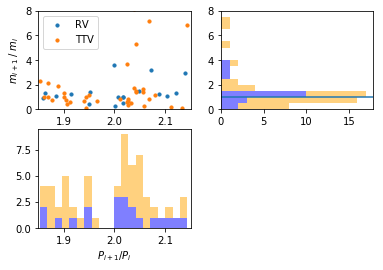

In [ ]:
ax1= plt.subplot(2,2,1)
plt.xlim(1.85,2.15)
plt.ylim(0.0,8)
plt.xlabel(r"$P_{i+1}\;/\;P_i$");
plt.ylabel(r"$m_{i+1}\;/\;m_i$");
plt.scatter(M[condr,30].astype('float'),M[condr,32].astype('float'),s=10, label='RV')
# plt.scatter(M[condttv,30].astype('float'),M[condttv,32].astype('float'),s=10, label='TTV')
plt.scatter(M[condt,30].astype('float'),M[condt,31].astype('float'),s=10, label='TTV')
plt.legend()

ax2=plt.subplot(2,2,2)
plt.ylim(0,8)
plt.hist((M[condr,32].astype('float'),M[condt,31].astype('float')), bins=np.arange(0,8,0.5), orientation='horizontal', color=('blue','orange'), stacked= True, alpha=0.5);
# plt.hist(, bins=np.arange(0,4,0.5), orientation='horizontal', color='blue', stacked= True, alpha=0.5);
plt.axhline(y=1);

plt.subplot(2,2,3)
plt.xlim(1.85,2.15)
plt.hist((M[condr,30].astype('float'),M[condtm,30].astype('float')), bins=20, color=('blue','orange'), stacked= True, alpha=0.5);
#plt.hist(M[condt,30].astype('float'), bins=np.arange(1.9,2.1,0.01), color='gray');
plt.xlabel(r"$P_{i+1}/P_i$");

plt.savefig('pratmrat.png',dpi=300,bbox_inches="tight")


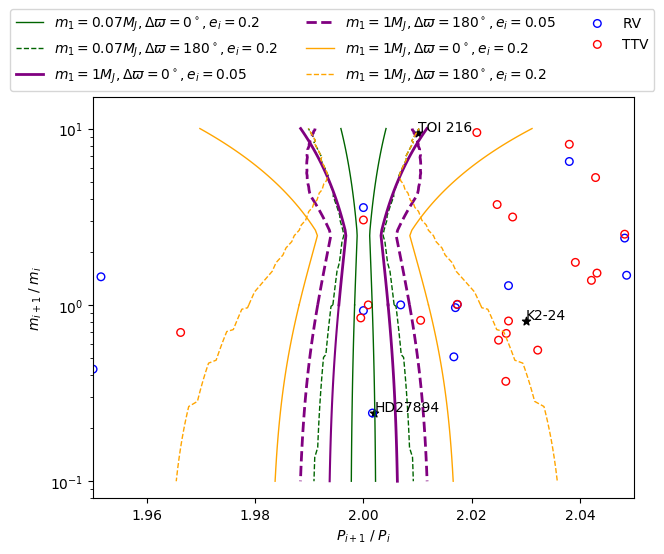

In [ ]:
fdpi0   = pandas.read_csv('data-dpi0-1.dat', delimiter='\s+', skiprows=0 , header = None)   #m2/m1>1
fdpi180 = pandas.read_csv('data-dpi180-1.dat', delimiter='\s+', skiprows=0, header = None) # m2/m1>1   0.03
fdpi20   = pandas.read_csv('data-dpi0-2.dat', delimiter='\s+', skiprows=0, header = None)   
fdpi2180 = pandas.read_csv('data-dpi180-2.dat', delimiter='\s+', skiprows=0 , header = None)
fdpi30   = pandas.read_csv('data-dpi0-3.dat', delimiter='\s+', skiprows=0, header = None)   
fdpi3180 = pandas.read_csv('data-dpi180-3.dat', delimiter='\s+', skiprows=0, header = None )
fdpi40   = pandas.read_csv('data-dpi0-4.dat', delimiter='\s+', skiprows=0, header = None)   # m2/m1>1   1 mjup
fdpi4180 = pandas.read_csv('data-dpi180-4.dat', delimiter='\s+', skiprows=0, header = None)
fdpi70   = pandas.read_csv('data-dpi0-7.dat', delimiter='\s+', skiprows=0, header = None)   
fdpi7180 = pandas.read_csv('data-dpi180-7.dat', delimiter='\s+', skiprows=0, header = None )
fdpi80   = pandas.read_csv('data-dpi0-8.dat', delimiter='\s+', skiprows=0, header = None)   # m2/m1>1   1 mjup
fdpi8180 = pandas.read_csv('data-dpi180-8.dat', delimiter='\s+', skiprows=0, header = None)

fdpi0.columns    = [ 'mrat',  'aint', 'aext']  
fdpi180.columns  = [ 'mrat',  'aint', 'aext']  
fdpi20.columns   = [ 'mrat',  'aint', 'aext']  
fdpi2180.columns = [ 'mrat',  'aint', 'aext']  
fdpi30.columns   = [ 'mrat',  'aint', 'aext']  
fdpi3180.columns = [ 'mrat',  'aint', 'aext']  
fdpi40.columns   = [ 'mrat',  'aint', 'aext']  
fdpi4180.columns = [ 'mrat',  'aint', 'aext']  
fdpi70.columns   = [ 'mrat',  'aint', 'aext']  
fdpi7180.columns = [ 'mrat',  'aint', 'aext']  
fdpi80.columns   = [ 'mrat',  'aint', 'aext']  
fdpi8180.columns = [ 'mrat',  'aint', 'aext']  


p1=(0.15)**(3./2.)
p2=2.*p1

#M1 = pandas.read_csv('catalogo.csv')
# p1.columns = [ 't',  'a',  'e',  'i',  'M', 'w', 'N',  'meg',  'lya', 'd']#p1=np.loadtxt('1.aeia', unpack=True)


# plt.figure(figsize=(7,6))

# plt.scatter(M[condr,30].astype('float'),M[condr,32].astype('float'),s=10, c='k')
# plt.scatter(M[condt,30].astype('float'),M[condt,31].astype('float'),s=10, c='k')

plt.xlabel(r"$P_{i+1} \;/\; P_i$");
plt.ylabel(r"$m_{i+1}\;/\;m_i$");
xmin=1.95
xmax=2.05
ymin=0.08
ymax=15
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
# plt.axhline(y=1, c='k')
# plt.axhline(y=0.8, c='k')
# plt.axhline(y=1.2,c='k')
plt.yscale('log')

ytoi =9.49   ; xtoi =2.01
yk224=0.81   ; xk224=2.03
yhd  =0.2436 ; xhd  =2.002

plt.text(xtoi ,ytoi*1.02 ,'TOI 216')
plt.text(xk224,yk224*1.02,'K2-24')
plt.text(xhd,  yhd*1.02  ,'HD27894')
xp=[xtoi,xk224,xhd]
yp=[ytoi,yk224,yhd]
plt.scatter(xp ,yp , marker='*', c='k' )

# plt.plot((p2/(p1-(np.maximum(fdpi0.aint/2.,fdpi0.aext/2.))**(3./2.))),fdpi0.mrat,c='darkgreen',lw=1, label=r'$m_1=0.02 M_J, \Delta\varpi=0^\circ,  e_i=0.05$')
# plt.plot((p2/(p1+(np.maximum(fdpi0.aint/2.,fdpi0.aext/2.))**(3./2.))),fdpi0.mrat,c='darkgreen',lw=1, label='_nolegend_')
# plt.plot((p2/(p1-(np.maximum(fdpi180.aint/2.,fdpi180.aext/2.))**(3./2.))),fdpi180.mrat,'--', c='darkgreen',lw=1, label=r'$m_1=0.02 M_J, \Delta\varpi=180^\circ,  e_i=0.05$')
# plt.plot((p2/(p1+(np.maximum(fdpi180.aint/2.,fdpi180.aext/2.))**(3./2.))),fdpi180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')
# plt.plot((p2/(p1-(fdpi20.aext/2.)**(3./2.))),fdpi20.mrat,c='darkgreen',lw=1, label='_nolegend_')
# plt.plot((p2/(p1+(fdpi20.aext/2.)**(3./2.))),fdpi20.mrat,c='darkgreen',lw=1, label='_nolegend_')
# plt.plot((p2/(p1-(fdpi2180.aext/2.)**(3./2.))),fdpi2180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')
# plt.plot((p2/(p1+(fdpi2180.aext/2.)**(3./2.))),fdpi2180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')
fdpi0    = pandas.read_csv('data-razao10-dpi0.dat', delimiter='\s+', skiprows=0 , header = None)   #m2/m1>1
fdpi180  = pandas.read_csv('data-razao10-dpi180.dat', delimiter='\s+', skiprows=0, header = None) # m2/m1>1   0.03
fdpi2180   = pandas.read_csv('data-razao01-dpi180.dat', delimiter='\s+', skiprows=0, header = None)   
fdpi20 = pandas.read_csv('data-razao01-dpi0.dat', delimiter='\s+', skiprows=0 , header = None)
fdpi0.columns    = [ 'mrat',  'aint', 'aext']  
fdpi180.columns  = [ 'mrat',  'aint', 'aext']  
fdpi20.columns   = [ 'mrat',  'aint', 'aext']  
fdpi2180.columns = [ 'mrat',  'aint', 'aext']

plt.plot((p2/(p1-(np.maximum(fdpi0.aint/2.,fdpi0.aext/2.))**(3./2.))),fdpi0.mrat,c='darkgreen',lw=1, label=r'$m_1=0.07 M_J, \Delta\varpi=0^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi0.aint/2.,fdpi0.aext/2.))**(3./2.))),fdpi0.mrat,c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(np.maximum(fdpi180.aint/2.,fdpi180.aext/2.))**(3./2.))),fdpi180.mrat,'--', c='darkgreen',lw=1, label=r'$m_1=0.07 M_J, \Delta\varpi=180^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi180.aint/2.,fdpi180.aext/2.))**(3./2.))),fdpi180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi20.aext/2.)**(3./2.))),fdpi20.mrat,c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1+(fdpi20.aext/2.)**(3./2.))),fdpi20.mrat,c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi2180.aext/2.)**(3./2.))),fdpi2180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1+(fdpi2180.aext/2.)**(3./2.))),fdpi2180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')

plt.plot((p2/(p1-(np.maximum(fdpi30.aint/2.,fdpi30.aext/2.))**(3./2.))),fdpi30.mrat,c='purple', lw=2, label=r'$m_1=1 M_J, \Delta\varpi=0^\circ, e_i=0.05$')
plt.plot((p2/(p1+(np.maximum(fdpi30.aint/2.,fdpi30.aext/2.))**(3./2.))),fdpi30.mrat,c='purple',lw=2, label='_nolegend_')
plt.plot((p2/(p1-(np.maximum(fdpi3180.aint/2.,fdpi3180.aext/2.))**(3./2.))),fdpi3180.mrat,'--',c='purple',lw=2, label=r'$m_1=1 M_J, \Delta\varpi=180^\circ, e_i=0.05$')
plt.plot((p2/(p1+(np.maximum(fdpi3180.aint/2.,fdpi3180.aext/2.))**(3./2.))),fdpi3180.mrat,'--',c='purple',lw=2, label='_nolegend_')
plt.plot((p2/(p1-(fdpi40.aext/2.)**(3./2.))),fdpi40.mrat,c='purple',lw=2, label='_nolegend_')
plt.plot((p2/(p1+(fdpi40.aext/2.)**(3./2.))),fdpi40.mrat,c='purple', label='_nolegend_')
plt.plot((p2/(p1-(fdpi4180.aext/2.)**(3./2.))),fdpi4180.mrat,'--',c='purple',lw=2, label='_nolegend_')
plt.plot((p2/(p1+(fdpi4180.aext/2.)**(3./2.))),fdpi4180.mrat,'--',c='purple',lw=2, label='_nolegend_')

plt.plot((p2/(p1-(np.maximum(fdpi70.aint/2.,fdpi70.aext/2.))**(3./2.))),fdpi70.mrat,c='orange',lw=1, label=r'$m_1=1 M_J, \Delta\varpi=0^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi70.aint/2.,fdpi70.aext/2.))**(3./2.))),fdpi70.mrat,c='orange',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(np.maximum(fdpi180.aint/2.,fdpi7180.aext/2.))**(3./2.))),fdpi7180.mrat,'--', c='orange',lw=1, label=r'$m_1=1 M_J, \Delta\varpi=180^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi180.aint/2.,fdpi7180.aext/2.))**(3./2.))),fdpi7180.mrat,'--', c='orange',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi80.aext/2.)**(3./2.))),fdpi80.mrat,c='orange',lw=1, label='_nolegend_')
plt.plot((p2/(p1+(fdpi80.aext/2.)**(3./2.))),fdpi80.mrat,c='orange',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi8180.aext/2.)**(3./2.))),fdpi8180.mrat,'--', c='orange',lw=1, label='_nolegend_')
plt.plot((p2/(p1+(fdpi8180.aext/2.)**(3./2.))),fdpi8180.mrat,'--', c='orange',lw=1, label='_nolegend_')

plt.scatter(M[cond,30].astype('float'),M[cond,32].astype('float'), s=30,label='RV', color="none", edgecolor="blue")

plt.scatter(M[cond,30].astype('float'),M[cond,31].astype('float'), s=30,label='TTV', color="none", edgecolor="red")

i = 0
plt.tight_layout()
# plt.legend(ncol=2, bbox_to_anchor=(1.1, 1.1))
plt.legend(ncol=3,loc=4,bbox_to_anchor=(1.05, 1))

plt.savefig('ratios.png',dpi=200,bbox_inches="tight")


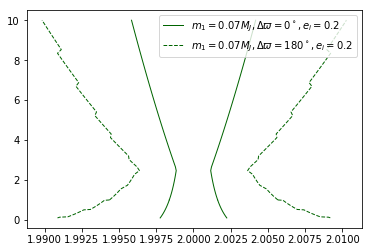

In [ ]:
fdpi0    = pandas.read_csv('data-razao10-dpi0.dat', delimiter='\s+', skiprows=0 , header = None)   #m2/m1>1
fdpi180  = pandas.read_csv('data-razao10-dpi180.dat', delimiter='\s+', skiprows=0, header = None) # m2/m1>1   0.03
fdpi2180   = pandas.read_csv('data-razao01-dpi180.dat', delimiter='\s+', skiprows=0, header = None)   
fdpi20 = pandas.read_csv('data-razao01-dpi0.dat', delimiter='\s+', skiprows=0 , header = None)
fdpi0.columns    = [ 'mrat',  'aint', 'aext']  
fdpi180.columns  = [ 'mrat',  'aint', 'aext']  
fdpi20.columns   = [ 'mrat',  'aint', 'aext']  
fdpi2180.columns = [ 'mrat',  'aint', 'aext']
plt.plot((p2/(p1-(np.maximum(fdpi0.aint/2.,fdpi0.aext/2.))**(3./2.))),fdpi0.mrat,c='darkgreen',lw=1, label=r'$m_1=0.07 M_J, \Delta\varpi=0^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi0.aint/2.,fdpi0.aext/2.))**(3./2.))),fdpi0.mrat,c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(np.maximum(fdpi180.aint/2.,fdpi180.aext/2.))**(3./2.))),fdpi180.mrat,'--', c='darkgreen',lw=1, label=r'$m_1=0.07 M_J, \Delta\varpi=180^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi180.aint/2.,fdpi180.aext/2.))**(3./2.))),fdpi180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi20.aext/2.)**(3./2.))),fdpi20.mrat,c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1+(fdpi20.aext/2.)**(3./2.))),fdpi20.mrat,c='darkgreen',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi2180.aext/2.)**(3./2.))),fdpi2180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_') 
plt.plot((p2/(p1+(fdpi2180.aext/2.)**(3./2.))),fdpi2180.mrat,'--', c='darkgreen',lw=1, label='_nolegend_')
plt.legend()

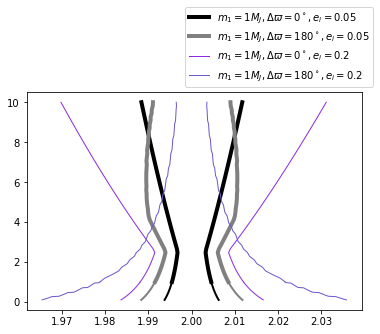

In [ ]:
plt.plot((p2/(p1-(np.maximum(fdpi30.aint/2.,fdpi30.aext/2.))**(3./2.))),fdpi30.mrat,c='k', lw=4, label=r'$m_1=1 M_J, \Delta\varpi=0^\circ, e_i=0.05$')
plt.plot((p2/(p1+(np.maximum(fdpi30.aint/2.,fdpi30.aext/2.))**(3./2.))),fdpi30.mrat,c='k',lw=4, label='_nolegend_')
plt.plot((p2/(p1-(np.maximum(fdpi3180.aint/2.,fdpi3180.aext/2.))**(3./2.))),fdpi3180.mrat,c='gray',lw=4, label=r'$m_1=1 M_J, \Delta\varpi=180^\circ, e_i=0.05$')
plt.plot((p2/(p1+(np.maximum(fdpi3180.aint/2.,fdpi3180.aext/2.))**(3./2.))),fdpi3180.mrat,c='gray',lw=4, label='_nolegend_')
plt.plot((p2/(p1-(fdpi40.aext/2.)**(3./2.))),fdpi40.mrat,c='k',lw=2, label='_nolegend_')
plt.plot((p2/(p1+(fdpi40.aext/2.)**(3./2.))),fdpi40.mrat,c='k',lw=2, label='_nolegend_')
plt.plot((p2/(p1-(fdpi4180.aext/2.)**(3./2.))),fdpi4180.mrat,c='gray',lw=2, label='_nolegend_')
plt.plot((p2/(p1+(fdpi4180.aext/2.)**(3./2.))),fdpi4180.mrat,c='gray',lw=2, label='_nolegend_')

plt.plot((p2/(p1-(np.maximum(fdpi70.aint/2.,fdpi70.aext/2.))**(3./2.))),fdpi70.mrat,c='blueviolet',lw=1, label=r'$m_1=1 M_J, \Delta\varpi=0^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi70.aint/2.,fdpi70.aext/2.))**(3./2.))),fdpi70.mrat,c='blueviolet',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(np.maximum(fdpi180.aint/2.,fdpi7180.aext/2.))**(3./2.))),fdpi7180.mrat,c='slateblue',lw=1, label=r'$m_1=1 M_J, \Delta\varpi=180^\circ,  e_i=0.2$')
plt.plot((p2/(p1+(np.maximum(fdpi180.aint/2.,fdpi7180.aext/2.))**(3./2.))),fdpi7180.mrat,c='slateblue',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi80.aext/2.)**(3./2.))),fdpi80.mrat,c='blueviolet',lw=1, label='_nolegend_')
plt.plot((p2/(p1+(fdpi80.aext/2.)**(3./2.))),fdpi80.mrat,c='blueviolet',lw=1, label='_nolegend_')
plt.plot((p2/(p1-(fdpi8180.aext/2.)**(3./2.))),fdpi8180.mrat,c='slateblue',lw=1, label='_nolegend_')
plt.plot((p2/(p1+(fdpi8180.aext/2.)**(3./2.))),fdpi8180.mrat,c='slateblue',lw=1, label='_nolegend_')

plt.savefig('ratios2.png',dpi=300,bbox_inches="tight")

plt.legend(loc=4,bbox_to_anchor=(1.05, 1))

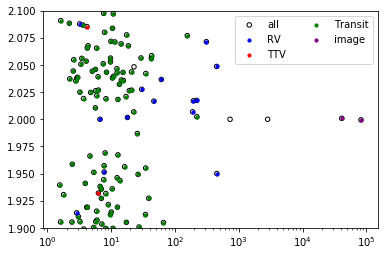

In [ ]:
plt.xscale('log')
plt.ylim(1.9,2.1)


plt.scatter(M[cond,11].astype('float'),M[cond,30].astype('float'), s=20,label='all', color="none", edgecolor="black")

plt.scatter(M[condr,11].astype('float'),M[condr,30].astype('float'), s=10,label='RV', color="blue")

plt.scatter(M[condttv,11].astype('float'),M[condttv,30].astype('float'), s=10,label='TTV', color="red")

plt.scatter(M[condt,11].astype('float'),M[condt,30].astype('float'), s=10,label='Transit', color="green")

plt.scatter(M[condi,11].astype('float'),M[condi,30].astype('float'), s=10,label='image', color="purple")

i = 0

plt.legend(ncol=2)


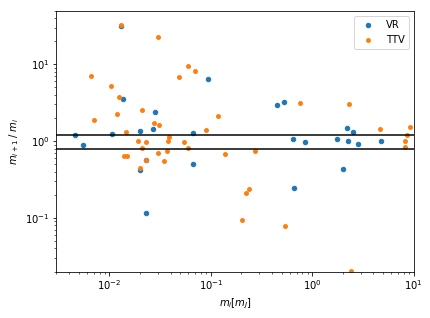

In [ ]:
plt.figure(figsize=(6.4,4.8))

plt.scatter(M[cond,5].astype('float'),M[cond,32].astype('float'), s=20, label='VR')

plt.scatter(M[cond,2].astype('float'),M[cond,31].astype('float'), s=15, label= 'TTV')

# plt.scatter(M[condr,30].astype('float'),M[condr,32].astype('float'),s=10, c='k')
# plt.scatter(M[condt,30].astype('float'),M[condt,31].astype('float'),s=10, c='k')

plt.xlabel(r"$m_{i} [m_J]$");
plt.ylabel(r"$m_{i+1}\;/\;m_i$");
# xmin=1.85
# xmax=2.15 
ymin=0.02
ymax=50
plt.xlim(0.003,10) 
plt.ylim(ymin,ymax)
# plt.axhline(y=1, c='k')
plt.axhline(y=0.8, c='k')
plt.axhline(y=1.2,c='k')
plt.yscale('log')
plt.xscale('log')
plt.legend()
i = 0

plt.savefig('ratiosm.png',dpi=300,bbox_inches="tight")


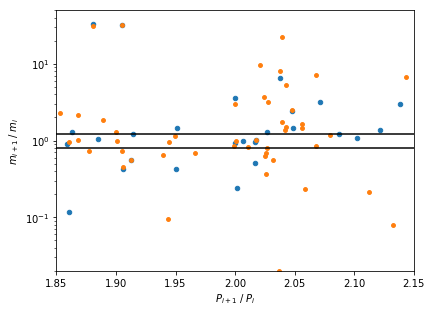

In [ ]:

plt.figure(figsize=(6.4,4.8))

plt.scatter(M[cond,30].astype('float'),M[cond,32].astype('float'), s=20)

plt.scatter(M[cond,30].astype('float'),M[cond,31].astype('float'), s=15)

# plt.scatter(M[condr,30].astype('float'),M[condr,32].astype('float'),s=10, c='k')
# plt.scatter(M[condt,30].astype('float'),M[condt,31].astype('float'),s=10, c='k')

plt.xlabel(r"$P_{i+1} \;/\; P_i$");
plt.ylabel(r"$m_{i+1}\;/\;m_i$");
xmin=1.85
xmax=2.15
ymin=0.02
ymax=50
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
# plt.axhline(y=1, c='k')
plt.axhline(y=0.8, c='k')
plt.axhline(y=1.2,c='k')
plt.yscale('log')
i = 0

plt.savefig('ratios.png',dpi=300,bbox_inches="tight")


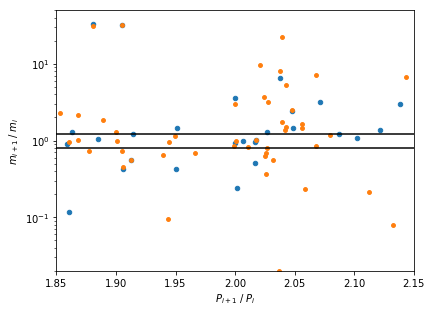

In [ ]:

plt.figure(figsize=(6.4,4.8))

plt.scatter(M[cond,30].astype('float'),M[cond,32].astype('float'), s=20)

plt.scatter(M[cond,30].astype('float'),M[cond,31].astype('float'), s=15)

# plt.scatter(M[condr,30].astype('float'),M[condr,32].astype('float'),s=10, c='k')
# plt.scatter(M[condt,30].astype('float'),M[condt,31].astype('float'),s=10, c='k')

plt.xlabel(r"$P_{i+1} \;/\; P_i$");
plt.ylabel(r"$m_{i+1}\;/\;m_i$");
xmin=1.85
xmax=2.15
ymin=0.02
ymax=50
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
# plt.axhline(y=1, c='k')
plt.axhline(y=0.8, c='k')
plt.axhline(y=1.2,c='k')
plt.yscale('log')
i = 0

plt.savefig('ratios.png',dpi=300,bbox_inches="tight")


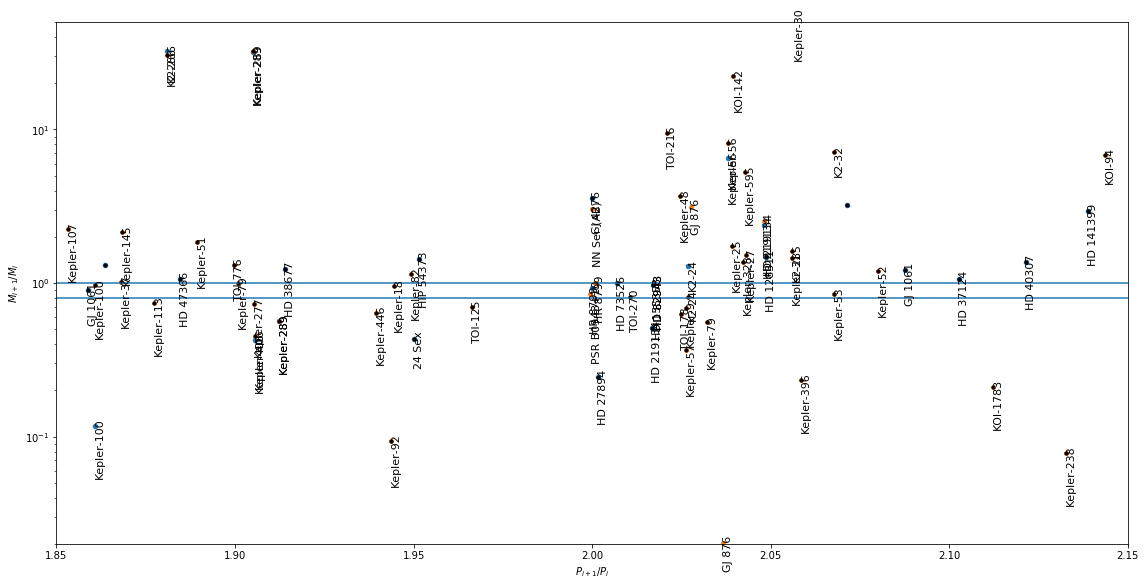

In [ ]:

plt.figure(figsize=(3*6.4,2*4.8))

plt.scatter(M[cond,30].astype('float'),M[cond,32].astype('float'), s=20)

plt.scatter(M[cond,30].astype('float'),M[cond,31].astype('float'), s=15)

plt.scatter(M[condr,30].astype('float'),M[condr,32].astype('float'),s=10, c='k')
plt.scatter(M[condt,30].astype('float'),M[condt,31].astype('float'),s=10, c='k')

plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel(r"$M_{i+1}/M_i$");
xmin=1.85
xmax=2.15
ymin=0.02
ymax=50
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.axhline(y=1)
plt.axhline(y=0.8)
plt.yscale('log')
i = 0

while i < len(M[cond,68])-3:
#     if (M[cond,63][i]=='Default'): M[cond,63][i]='Radial Velocity'
#     if (M[cond,68][i]=='Kepler-289'):
#         print (M[cond,30][i],M[cond,11][i],M[cond,11][i+1],i)
#         print (M[cond,32][i],M[cond,5][i]*317.83,M[cond,5][i+1]*317.83,i)
#         print ('')
# #     Mc = M[~(M1.radius.isnull()) & ~np.isnan(M1.radius) 
# #      & ~(M1.mass.isnull())   & ~np.isnan(M1.mass) ]
    if((M[cond,32][i]) == M[cond,32][i] ):   #para evitar q imprima con plt.tex cosas q no sirven
#         print(M[cond,30][i],M[cond,32][i],M[cond,68][i])
        plt.text(M[cond,30][i],M[cond,32][i],M[cond,68][i], size=11, rotation= 90, ha= 'left')
    if((M[cond,31][i]) == M[cond,31][i] ):   #para evitar q imprima con plt.tex cosas q no sirven
#         print(M[cond,30][i],M[cond,31][i],M[cond,68][i])
        plt.text(M[cond,30][i],M[cond,31][i],M[cond,68][i], size=11, rotation= 90, ha= 'left')        
#     if((M[cond,31][i]) == M[cond,31][i] ):   #para evitar q imprima con plt.tex cosas q no sirven
#         plt.text(M[cond,30][i],M[cond,31][i],M[cond,68][i], size=11, rotation= 90, ha= 'left')
    i=i+1
# plt.savefig('mratd.png',dpi=300,bbox_inches="tight")


In [ ]:
plt.scatter(M[cond,30].astype('float'),M[cond,32].astype('float'),s=10, label=(r"$Msin_{i+1}$ / $Msin_{i}$"))
plt.scatter(M[cond,30].astype('float'),M[cond,31].astype('float'),s=10, label=(r"$M_{i+1}$ / $M_i$)"))

plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel(r"$M_{i+1}/M_i$");
# xmin=1.85
# xmax=5.15
m2m1k2a=1.285
m2m1k2b=0.81
p2p1k2 =2.0284
m2m1toia=
m2m1toib=
p2p1toi =

ymin=0.2
ymax=10
# plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.axhline(y=1)
plt.axhline(y=0.8)
# plt.yscale('log')
i = 0
plt.legend(loc='upper left')
plt.savefig('mratnolog.png',dpi=300,bbox_inches="tight")


SyntaxError: invalid syntax (<ipython-input-41-9d497fa73128>, line 11)

In [ ]:
condg=M[:,68]=='GJ 876'
print(M[condg,(11,30,31,32)])   #condicion p2/p1 transits

In [ ]:
plt.scatter(M[cond,32].astype('float'),M[cond,32].astype('float'),s=10)
plt.xlabel(r"$M_{i+1} sin_{i+1}/M_i sin_{i}$");
plt.ylabel(r"$M_{i+1}/M_i$");
# xmin=1.85
# xmax=2.15
# ymin=0.1
# ymax=10
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.axhline(y=1)
# plt.axhline(y=0.8)
# plt.yscale('log')
i = 0
#plt.legend(loc='lower right')
plt.savefig('msin.png',dpi=300,bbox_inches="tight")


In [ ]:
plt.scatter(M[cond,30].astype('float'),M[cond,32].astype('float'))

plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel(r"$M_{i+1}/M_i$");
xmin=1.98
xmax=2.02
ymin=0.1
ymax=10
plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
plt.axhline(y=1)
plt.axhline(y=0.8)
plt.yscale('log')
i = 0
delta2 = 0.02

while i < len(M[cond,68])-1:
    if (M[cond,63][i]=='Default'): M[cond,63][i]='Radial Velocity'
    if (M[cond,68][i]=='GJ 876'):
        print (M[cond,30][i],M[cond,11][i],M[cond,11][i+1],i)
        print (M[cond,32][i],M[cond,5][i]*317.83,M[cond,5][i+1]*317.83,i)
        print ('')
#     Mc = M[~(M1.radius.isnull()) & ~np.isnan(M1.radius) 
#      & ~(M1.mass.isnull())   & ~np.isnan(M1.mass) ]

    if((M[cond,32][i]) == M[cond,32][i] and abs(M[cond,30][i]-2)<delta2):   #para evitar q imprima con plt.tex cosas q no sirven
        plt.text(M[cond,30][i],M[cond,32][i],M[cond,68][i], size=10, rotation= 90, ha= 'left')
    i=i+1
plt.savefig('mrat.png',dpi=300,bbox_inches="tight")


In [ ]:
#np.savetxt('mmr21.txt', (M[cond][30],M[cond][63]), delimiter=',')
masked = M[cond][:, [68, 63, 30, 32, 33, 2, 5 ]]

masked.shape
matrix=np.matrix(masked)
np.savetxt("mmr21.txt", matrix, fmt="%s",  delimiter='\t')

In [ ]:
plt.scatter(M[cond,30].astype('float'),M[cond,32].astype('float'))


In [ ]:
masked = M[cond][:, [68,30,32,33,2,5,11,17,82]]
masked
np.savetxt("mmr21.txt", masked, delimiter="\t", fmt="%s")

In [ ]:
M[cond].shape

In [ ]:
cond21 = abs(M[:,30].astype('float')-2)<0.15
plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel(r"$M_{i+1}/M_i$");
# xmin=1.85
# xmax=2.15
# ymin=0.01
# ymax=50
# plt.xlim(xmin,xmax)
# plt.ylim(ymin,ymax)
# plt.axhline(y=1)
# plt.axhline(y=0.8)
plt.yscale('log')

plt.scatter(M[cond & cond21,30].astype('float'),M[cond & cond21,32].astype('float'))

plt.scatter(M[cond & cond21,30].astype('float'),M[cond & cond21,33].astype('float'))

# M[(cond & cond21),32].astype('float')
                             
#M[cond &abs(M[cond,30].astype('float')-2)<0.15),32].astype('float') 
# plt.hist(M[(cond & cond21),32].astype('float'),bins=30,range=[0.01,30],alpha=0.5);

In [ ]:
x=M[cond & cond21,32].astype('float')
r=M[cond & cond21,33].astype('float')
# plt.hist(x);

# # histogram on log scale. 
# # Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(0.1),np.log10(30),20)
plt.subplot(211)
plt.hist(x, bins=logbins)
plt.xscale('log')

logbins = np.logspace(np.log10(0.1),np.log10(10),30)
plt.subplot(212)
plt.hist(r, bins=logbins)
plt.xscale('log')
plt.show()
plt.show()

In [ ]:
plt.scatter(M[cond & cond21,32].astype('float'),M[cond & cond21,33].astype('float'))


In [ ]:
plt.hist((M[condttv,30].astype('float'),M[condt,30].astype('float')),bins=10,range=[1.85,2.15],alpha=0.5);

In [ ]:
# iplanet = np.where(M[:,68] == "K2-24")
# i1,j1= {*iplanet[0]}
# # print (*iplanet[0],i1,j1, sep=',')
# print (M[i1,68],'P2/P1  =',M[i1,30] ,'\n',
#                 'M2/M1  =', M[i1,31],'\n',
#                 'M2/M1si=',M[i1,32] ,'\n',
#                 'R2/R1  =',M[i1,33], sep='  ')

# iplanet = np.where(M[:,68] == "TOI-216")
# i1,j1= {*iplanet[0]}
# print (*iplanet[0],i1,j1, sep=',')
# print (M[i1,68],'P2/P1  =',M[i1,30] ,'\n',
#                 'M2/M1  =', M[i1,31],'\n',
#                 'M2/M1si=',M[i1,32] ,'\n',
#                 'R2/R1  =',M[i1,33], sep='  ')


iplanet = np.where(M[:,68] == "Kepler-289")
i1,j1,k1= {*iplanet[0]}
print (*iplanet[0],i1,j1, sep=',')
print (M[i1,0],'P2/P1  =',M[i1,30] ,'\n',
                'M2/M1  =', M[i1,31],'\n',
                'M2/M1si=',M[i1,32] ,'\n',
                'R2/R1  =',M[i1,33], sep='  ')

print (M[j1,0],'P2/P1  =',M[j1,30] ,'\n',
                'M2/M1  =', M[j1,31],'\n',
                'M2/M1si=',M[j1,32] ,'\n',
                'R2/R1  =',M[j1,33], sep='  ')
print (M[(i1,j1,k1),0],M[(i1,j1,k1),11],*iplanet[0])

In [ ]:
i=0
M[:,1]=False
while True:
    M[i,30]=M[i+1,11]/M[i,11]  # guardo en la columna 30 el dato de Pi+1/Pi
    M[i,29]=M[i+1,11]/M[i,11]  # guardo en la columna 30 el dato de Pi+1/Pi
    M[i,1] =M[i+1,68]==M[i,68] and M[i,63]=='Radial Velocity'  # guardo en la columna 1  el dato de True o False si los nombres son iguales de i+1 con i 
#    print(M[i,1],M[i,30],M[i,68],M[i,11])   #esto imprimir para chequear
    i=i+1
    if (i>len(s1.star_mass)-3):        #uso esto para ver si anda el codigo
#    if (i>98):      #si descomento esta linea debo comentar la otra
        break   

In [ ]:
condr=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos 
r21r=M[condr,30].astype('float')   #condicion r2/r1 rv
p21r=M[condr,30].astype('float')   #condicion p2/p1 rv
p1r =M[condr,11].astype('float')   #condicion p1 rv
pnamer =M[condr,68].astype('str') #texto rv

In [ ]:
pnamer.dtype

In [ ]:
plt.scatter(p1, p21,  c='b', marker='x', label='All systems')
plt.scatter(p1t, p21t,  c='r', marker='o', label='Primary Transits')
plt.scatter(p1r, p21r,  c='g', marker='o', label='Radial Velocity')
plt.xlim(0.5,1000)
plt.ylim(1,10)
plt.xscale('log')
plt.legend(loc='upper left', scatterpoints=1)
plt.xlabel(r"$P_i$");
plt.ylabel(r"$P_{i+1}/P_i$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel(r"$P_{i+1}/P_i$");
plt.ylabel("Number of pairs");
plt.axvline(2., color='k', linestyle='--')
xposition = [7./4.,5./4., 4./3., 3./2.,2./1.]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.text(1.94,20,'2:1',rotation=90);
plt.text(1.44,20,'3:2',rotation=90);
plt.text(5./4.-0.06,20,'5:4',rotation=90);
plt.text(7./4.-0.06,20,'7:4',rotation=90);
plt.text(4./3.-0.06,20,'4:3',rotation=90);
plt.text(2.3,20,'Updated pairs, following Goldreich & Schlichting (2014).\n Only confirmed planets, May 2021, Giuppone',rotation=0);
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5);
plt.hist(p21t, bins=150,range=[1,4],edgecolor='black',alpha=0.5);
plt.savefig('mmr-pairs.png',dpi=300,bbox_inches="tight")

In [ ]:
#plt.figure(figsize=(12,4))
plt.rcParams['axes.formatter.useoffset'] = False #swicht off offset
#mpl.rcParams['axes.formatter.useoffset'] = False
# plt.rcParams['markeredgecolor'] = None #swicht off offset
plt.scatter(p1, p21,  c='b', marker='x', label='All systems')
plt.scatter(p1t, p21t,  c='r', marker='o', label='Primary Transits', linewidths=0, s=40)
plt.scatter(p1r, p21r,  c='g', marker='o', label='Radial Velocity', linewidths=0, s=40)

i=0
while True:
    if abs(p21[i]-2)<0.05:    #esta segunda condicion es para q no escriba todos los nombres
        plt.text(p1[i],p21[i],pname[i],fontsize=3, rotation=90)  #plt.text funciona solo con ESCALARES!
    i=i+1
    if (i>p21.size-1):
        break
        
plt.xlim(1,1000)
plt.ylim(1.95,2.05)
plt.xscale('log')
plt.legend(loc='lower left', scatterpoints=1)
plt.xlabel(r"$P_1$");
plt.ylabel(r"$P_2/P_1$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
plt.savefig('res21.pdf',bbox_inches='tight')
plt.show()

In [ ]:
pname.size, p1.size

In [ ]:
#plt.figure(figsize=(12,4))
plt.rcParams['axes.formatter.useoffset'] = False #swicht off offset
#mpl.rcParams['axes.formatter.useoffset'] = False
# plt.rcParams['markeredgecolor'] = None #swicht off offset
plt.scatter(p1, p21,  c='b', marker='x', label='All systems')
plt.scatter(p1t, p21t,  c='r', marker='o', label='Primary Transits', linewidths=0, s=40)
plt.scatter(p1r, p21r,  c='g', marker='o', label='Radial Velocity', linewidths=0, s=40)

# i=0
# while True:
#     if abs(p21[i]-2)<0.05:    #esta segunda condicion es para q no escriba todos los nombres
#         plt.text(p1[i],p21[i],pname[i],fontsize=3, rotation=90)  #plt.text funciona solo con ESCALARES!
#     i=i+1
#     if (i>p21.size-1):
#         break
        
plt.xlim(1,1000)
plt.ylim(1.95,2.05)
plt.xscale('log')
plt.legend(scatterpoints=1)
plt.xlabel(r"$P_1$");
plt.ylabel(r"$P_2/P_1$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
plt.savefig('res21.pdf',bbox_inches='tight')
plt.show()

ff  

In [ ]:
plt.figure()
plt.figure(figsize=(12,4))
#plt.style.use('classic')
       # create the first of two panels and set current axis
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.xlim(1,1e5)
plt.ylim(1.4,1.6)
plt.scatter(p1, p21,  c='b', marker='o', label='All systems')
plt.scatter(p1t, p21t,  c='r', marker='o', label='Primary Transits')
plt.scatter(p1r, p21r,  c='g', marker='o', label='Radial Velocity')
plt.axhline(y=1.5, color='k', linestyle='--')
plt.xscale('log')
plt.legend(loc='upper right', scatterpoints=1)
plt.xlabel(r"$P_1$");
plt.ylabel(r"$P_2/P_1$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
plt.rcParams["legend.frameon"] = True

# create the second panel and set current axis
plt.subplot(1, 2, 2)
plt.xlim(1,1e5)
plt.ylim(1.9,2.1)
plt.scatter(p1, p21,  c='b', marker='o', label='All systems')
plt.scatter(p1t, p21t,  c='r', marker='o', label='Primary Transits')
plt.scatter(p1r, p21r,  c='g', marker='o', label='Radial Velocity')
plt.axhline(y=2, color='k', linestyle='--')
plt.xscale('log')
#plt.legend(loc='upper right')
plt.xlabel(r"$P_1$");
plt.ylabel(r"$P_2/P_1$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
#plt.rcParams["legend.frameon"] = True


In [ ]:
plt.xlim(1,1e5)
plt.ylim(3.2,3.8)
plt.scatter(p1, p21,  c='b', marker='o', label='All systems')
plt.scatter(p1t, p21t,  c='r', marker='o', label='Primary Transits')
plt.scatter(p1r, p21r,  c='g', marker='o', label='Radial Velocity')
plt.axhline(y=3.5, color='k', linestyle='--')
plt.xscale('log')
plt.legend(loc='upper right', scatterpoints=1)
plt.xlabel(r"$P_1$");
plt.ylabel(r"$P_2/P_1$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
plt.rcParams["legend.frameon"] = True


In [ ]:
plt.xlim(1,1e5)
plt.ylim(1.1,2.5)
plt.scatter(p1, p21,  c='b', marker='o', label='All systems')
plt.scatter(p1t, p21t,  c='r', marker='o', label='Primary Transits')
plt.scatter(p1r, p21r,  c='g', marker='o', label='Radial Velocity')
plt.axhline(y=3.5, color='k', linestyle='--')
plt.xscale('log')
plt.legend(loc='upper right', scatterpoints=1)
plt.xlabel(r"$P_1$");
plt.ylabel(r"$P_{i+1}/P_{i}$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
plt.rcParams["legend.frameon"] = True


In [ ]:
plt.xlim(0.05,100)
plt.ylim(1.1,2.5)
plt.scatter(m21, p21,  c='b', marker='o', label='All systems')
plt.scatter(m21t, p21t,  c='r', marker='o', label='Primary Transits')
plt.scatter(m21r, p21r,  c='g', marker='o', label='Radial Velocity')
plt.axhline(y=3.5, color='k', linestyle='--')
plt.yscale('log')
plt.legend(loc='upper right', scatterpoints=1)
plt.xlabel(r"$M_{i+1}/M_{i}$$");
plt.ylabel(r"$P_{i+1}/P_{i}$");
plt.rcParams['xtick.labelsize'] = 10
plt.tick_params(direction='in', length=6, width=2, colors='k', grid_color='k', grid_alpha=0.5)
plt.rcParams["legend.frameon"] = True

In [ ]:
#condg=M[:,1].astype('bool')  #convertir a operator condicional!! todos los pi+1/pi q tengan tránsitos
condg=M[:,68]=='HR 8799'
p21g=M[condg,30].astype('float')   #condicion p2/p1 transits
p1g =M[condg,11].astype('float')   #condicion p1 transits

In [ ]:
#p21=M[cond,30].astype('float')   #tengo q especificarle q son números los q les paso a p21
condf=M[cond,11].astype('float')<1   #tengo q especificarle q son números los q les paso a p1

In [ ]:
G=M
i=5
if np.any(M[:,11]<1): print(M[:,11])

In [ ]:
s1.star_name[1014:1017]
s1.orbital_period[1014:1017]